In [1]:
import pandas as pd
import csv
import os, os.path
from sklearn.preprocessing import LabelEncoder
import sklearn as sk  
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm  
from sklearn.linear_model import LogisticRegression 
from sklearn.cluster import KMeans
from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn.cluster import SpectralClustering
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt 
# import numpy as np
# from sklearn import preprocessing
# import matplotlib.pyplot as plt 
# import seaborn as sns
# from numpy import array


In [2]:
#creating my dataframe
mydata=pd.DataFrame({"Db": [], "Hz": []})
labels=pd.DataFrame({"Male": [], "Feeling": [], "Person":[]})

In [3]:
students=['\\mario','\\giuliano','\\cristina'] #directory of records of each student
for i in students:
    
    cwd = os.getcwd() #current working directory
    sd = cwd + str(i) #student directory
    lab = pd.read_csv(str(sd)+'\\labels.csv', sep=';') #read the labels file
    labels=pd.concat([labels,lab], ignore_index=True)
    
    for k in range(1,len(os.listdir(sd))): #runs the cycle with respect to number of records for each student
        
        read = pd.read_csv(str(sd)+'\\sl Registrazione '+str(k)+'.csv', sep = ',') #read data  
        
        Db=read["DecibelSource"].dropna()  #clean from NAs
        Hz=read["PitchSensor"].dropna()    
        
        Db=list(Db)#make them to list to easier work later
        Hz=list(Hz)
        
        mydata=mydata.append({'Db' : Db , 'Hz' : Hz} , ignore_index=True)

    
result=pd.concat([mydata,labels], axis=1) #merge labels and data

In [4]:
result.head()

,Db,Hz,Feeling,Male,Person
0,"[51.509708077318315, 49.206463639207875, 53.09...","[83.5404052734375, 83.5404052734375, 83.540405...",angry,1.0,other
1,"[55.10859961906438, 51.864688959738814, 51.652...","[291.0975477430556, 331.6312255859375, 331.631...",happy,0.0,other
2,"[29.52738094783193, 27.660100580824576, 25.288...","[268.5400390625, 230.9423828125, 230.942382812...",steady,1.0,other
3,"[33.119446531464924, 28.733594908973828, 33.64...","[419.1162109375, 419.1162109375, 419.116210937...",sad,1.0,other
4,"[19.45318383545405, 18.038502361992837, 16.372...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 339.233398...",angry,0.0,other


# Cleaning

In [5]:
#see if there are problem with classes
print(set(result.Person))
print(set(result.Feeling))

{'other', 'mario', 'other ', 'cristina', 'giuliano'}
{'sad', 'serious', 'happy', 'angry', 'steady', 'sad '}


In [6]:
#fix them
for i in range(len(result)):
    if result['Feeling'][i]=='happy ':
        result['Feeling'][i]='happy'
    if result['Feeling'][i]=='serious':
        result['Feeling'][i]='steady'
    if result['Person'][i]=='other ':
        result['Person'][i]='other'
    if result['Feeling'][i]=='sad ':
        result['Feeling'][i]='sad'

C:\Users\yammo-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\yammo-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\yammo-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Categorical encoding

In [7]:
##transform every cathegorical var into numbers
le=LabelEncoder()

cat=['Feeling','Person']

for i in cat:
    result[i]=le.fit_transform(result[i].astype(str))

In [8]:
result.head()

,Db,Hz,Feeling,Male,Person
0,"[51.509708077318315, 49.206463639207875, 53.09...","[83.5404052734375, 83.5404052734375, 83.540405...",0,1.0,3
1,"[55.10859961906438, 51.864688959738814, 51.652...","[291.0975477430556, 331.6312255859375, 331.631...",1,0.0,3
2,"[29.52738094783193, 27.660100580824576, 25.288...","[268.5400390625, 230.9423828125, 230.942382812...",3,1.0,3
3,"[33.119446531464924, 28.733594908973828, 33.64...","[419.1162109375, 419.1162109375, 419.116210937...",2,1.0,3
4,"[19.45318383545405, 18.038502361992837, 16.372...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 339.233398...",0,0.0,3


In [9]:
#are the feeling balanced?
print(str(len(result.loc[result["Feeling"]==0]))+' angry records')
print(str(len(result.loc[result["Feeling"]==1]))+' happy records')
print(str(len(result.loc[result["Feeling"]==2]))+' sad records')
print(str(len(result.loc[result["Feeling"]==3]))+' steady records')
print('')
print(str(len(result.loc[result["Male"]==0]))+' female records')
print(str(len(result.loc[result["Male"]==1]))+' male records')

69 angry records
61 happy records
59 sad records
76 steady records

162 female records
103 male records


In [10]:
#evaluate mininum len
mini=100000000000000000 
for i in range(len(result)):
    now=len(result["Hz"][i]) #see lenght of first HZ vector
#     print(str(i)+ " " +str(now)) #print number of vector and his lenght
    if now<mini: #see if is the shortest vector
        mini=now #if shortest, update minimum value
# mini

In [11]:
##SOLO UNA PROVA!!! PROVARE AD USARE FRAMMENTI DI REGISTRAZIONE MOLTO PIU PICCOLI
# mini=20

In [12]:
#same len for all

for i in range(len(result)):
    result["Db"][i]=result["Db"][i][0:mini]

for i in range(len(result)):
    result["Hz"][i]=result["Hz"][i][0:mini]

C:\Users\yammo-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\yammo-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [13]:
#selecting only male and female to study their properties
male=result.loc[result["Male"]==1]
male=male.reset_index(drop=True)  #setting new indexes for the new DF
female=result.loc[result["Male"]==0]
female=female.reset_index(drop=True)

In [14]:
##let's see how the means differs
somma=0
for i in range(len(male)):
    somma+=mean(male["Db"][i])
print("mean for DB in male is "+str(round(somma/(len(male)+1),2)))

somma=0
for i in range(len(male)):
    somma+=mean(male["Hz"][i])
print("mean for HZ in male is " + str(round(somma/(len(male)+1),2)))

##now for female..
somma=0
for i in range(len(female)):
    somma+=mean(female["Db"][i])
print("mean for DB in female is "+str(round(somma/(len(female)+1),2)))

somma=0
for i in range(len(female)):
    somma+=mean(female["Hz"][i])
print("mean for HZ in female is " +str(round(somma/(len(female)+1),2)))

mean for DB in male is 45.04
mean for HZ in male is 308.47
mean for DB in female is 44.38
mean for HZ in female is 272.48


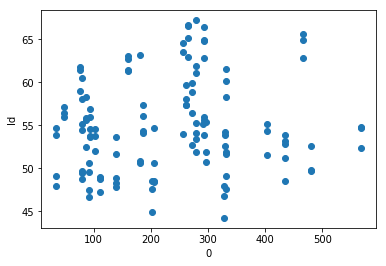

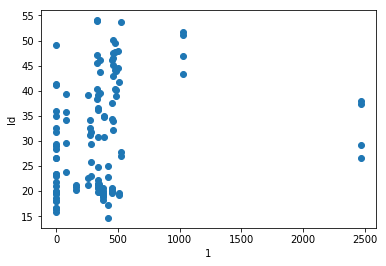

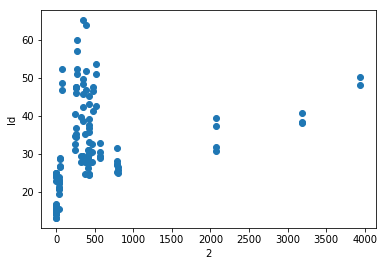

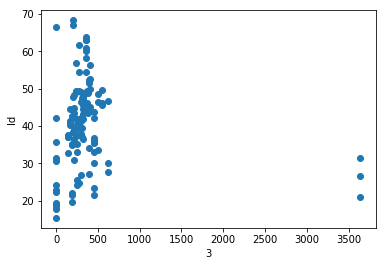

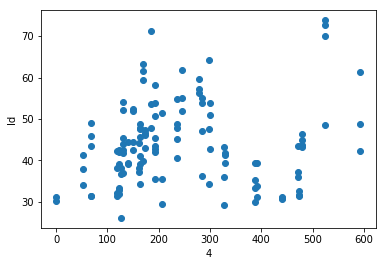

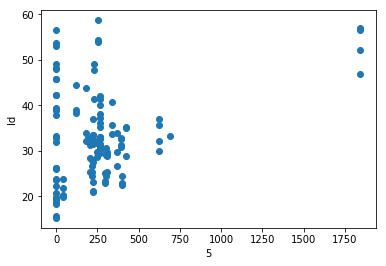

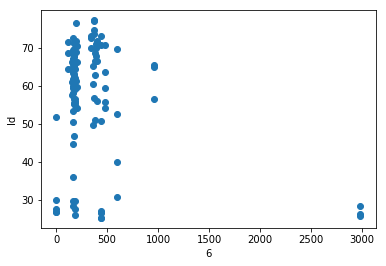

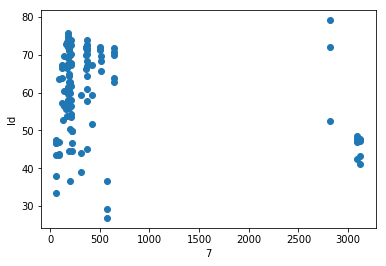

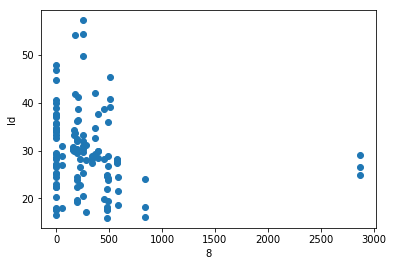

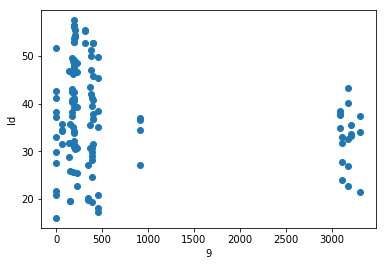

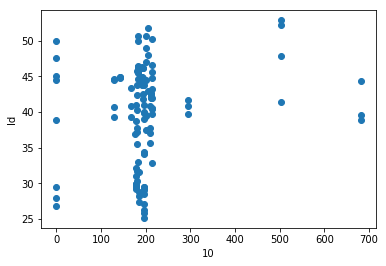

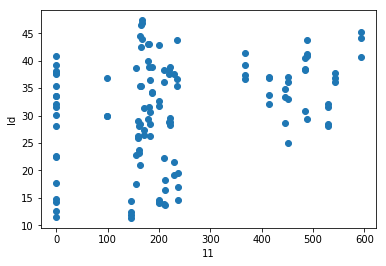

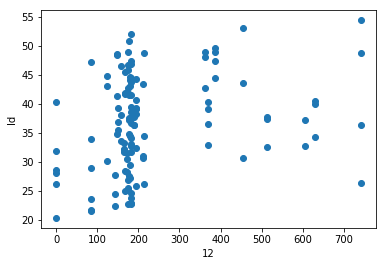

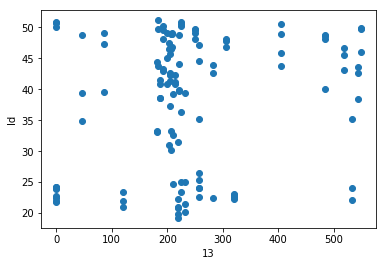

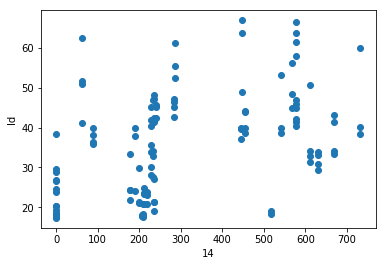

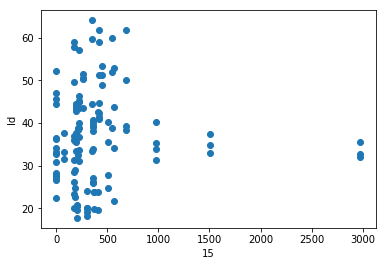

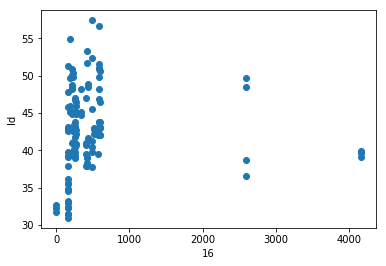

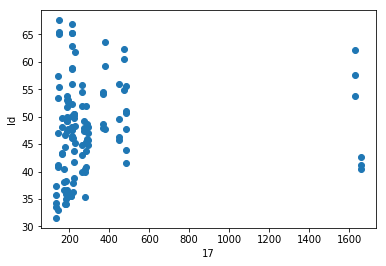

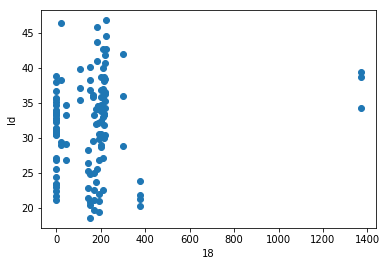

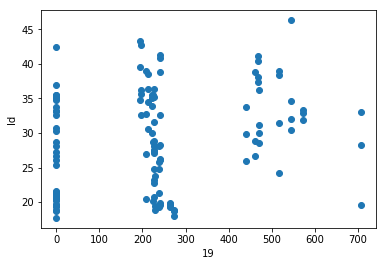

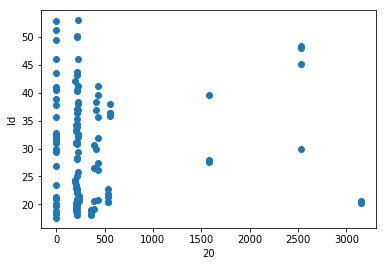

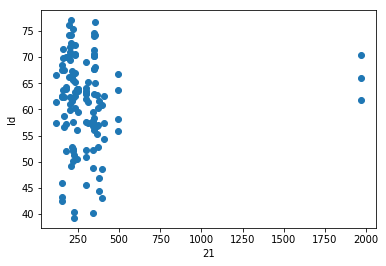

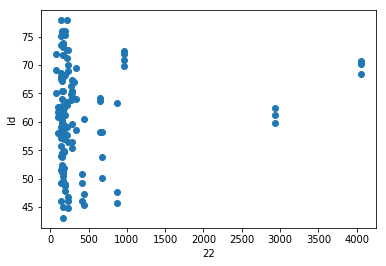

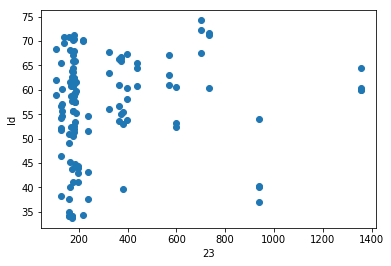

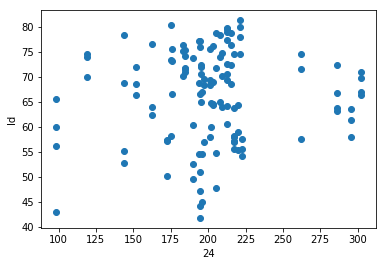

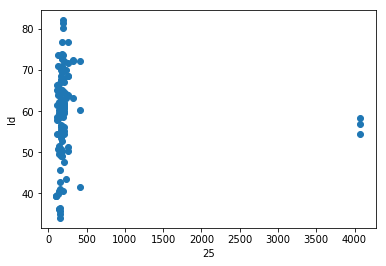

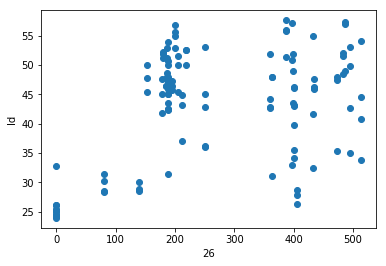

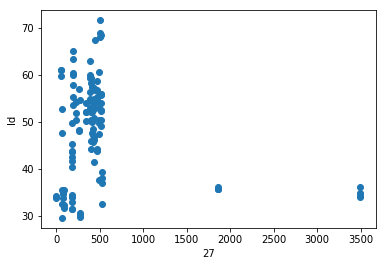

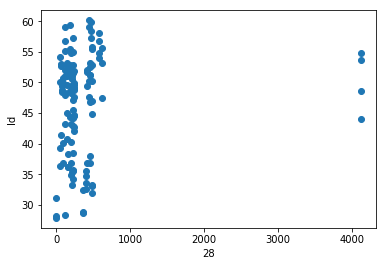

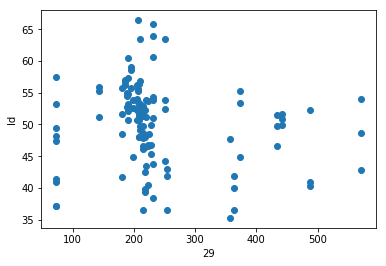

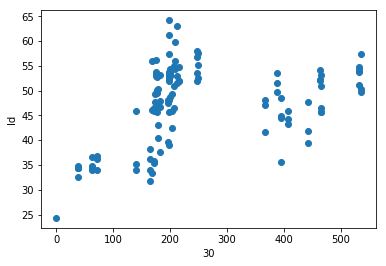

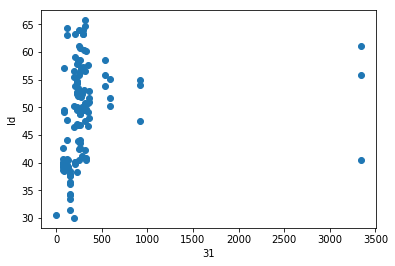

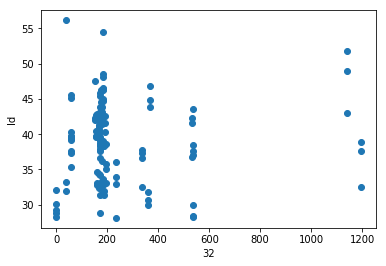

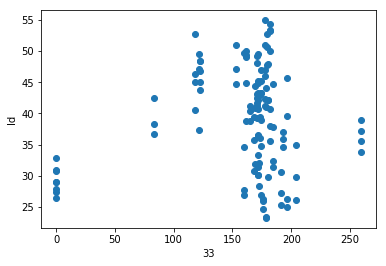

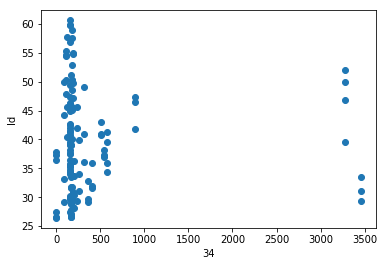

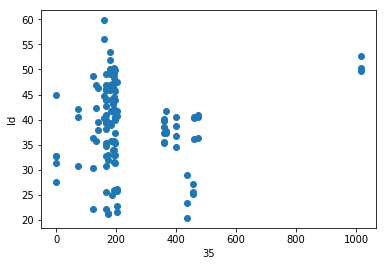

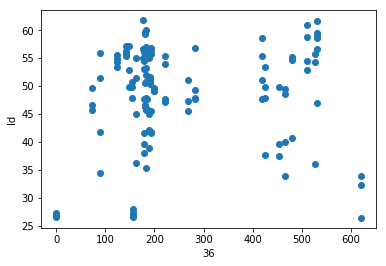

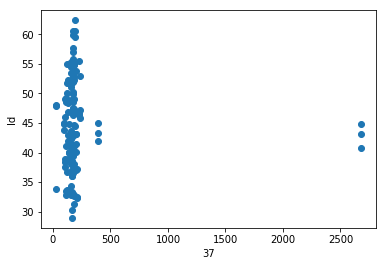

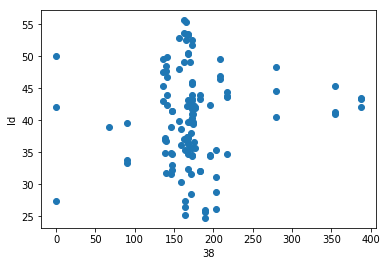

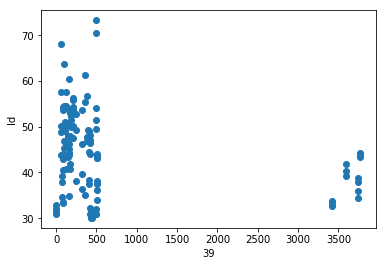

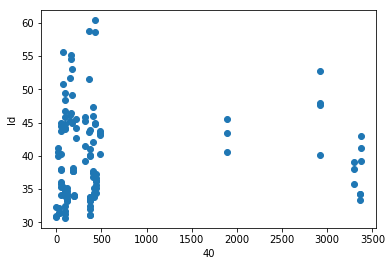

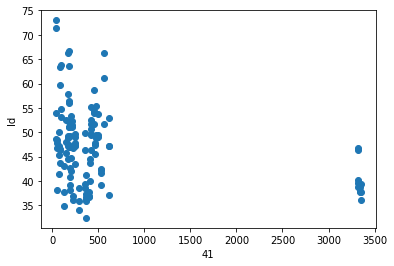

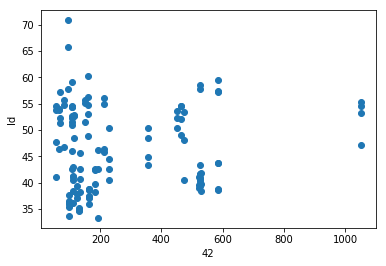

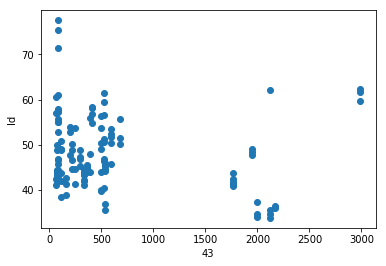

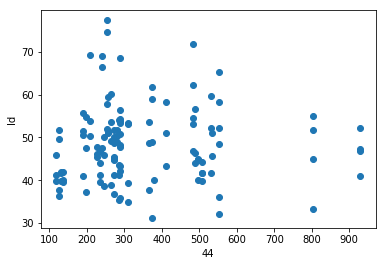

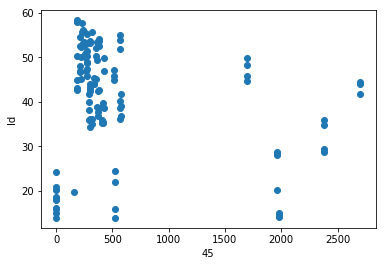

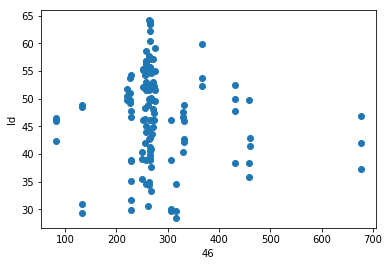

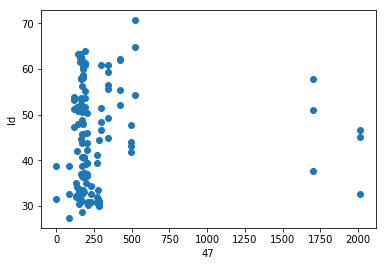

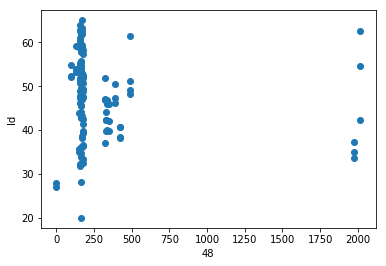

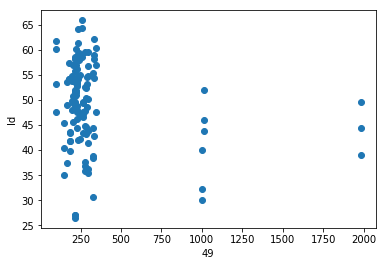

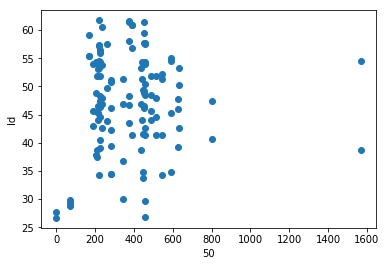

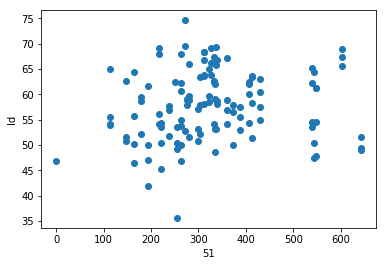

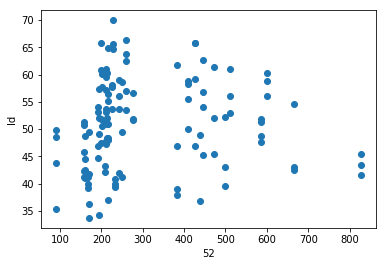

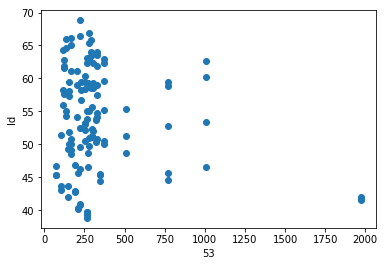

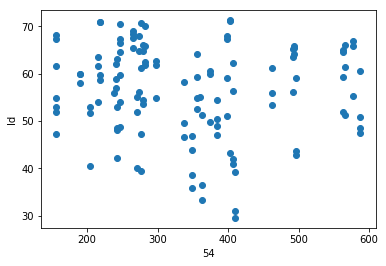

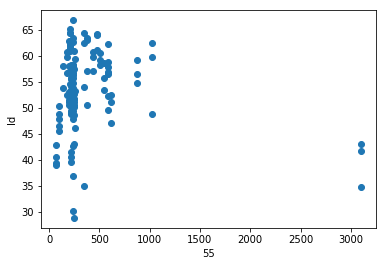

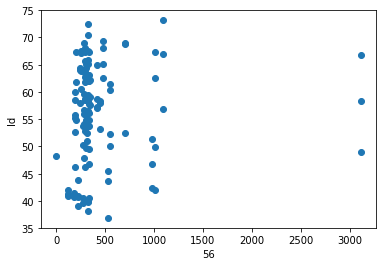

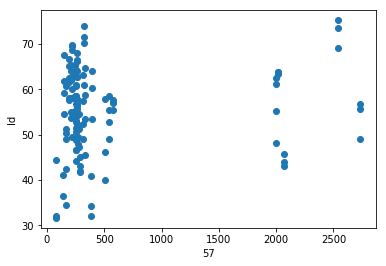

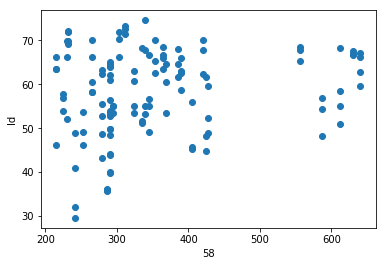

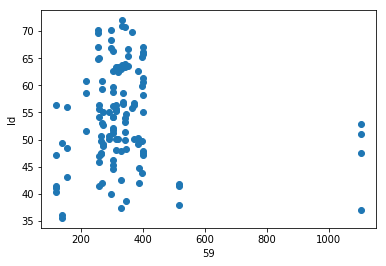

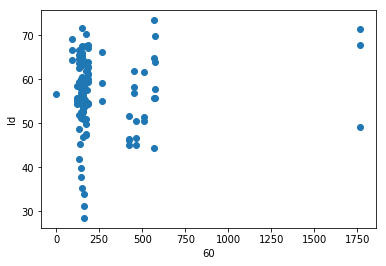

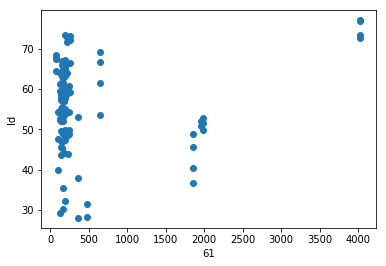

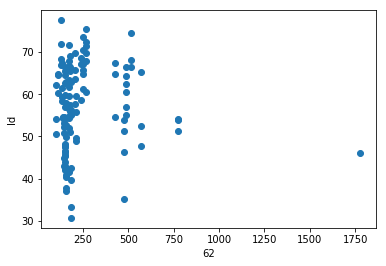

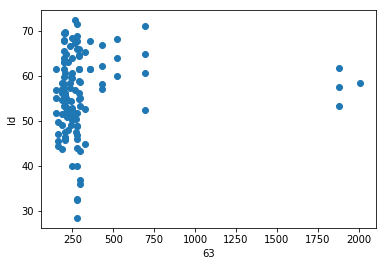

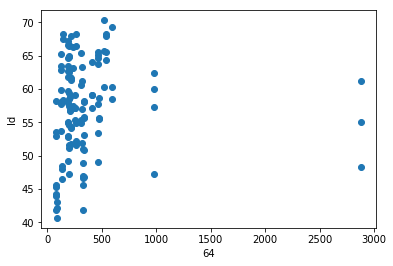

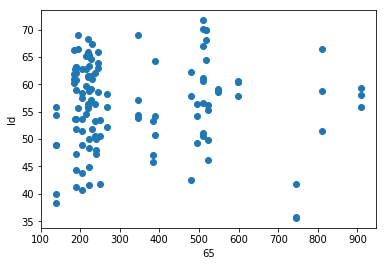

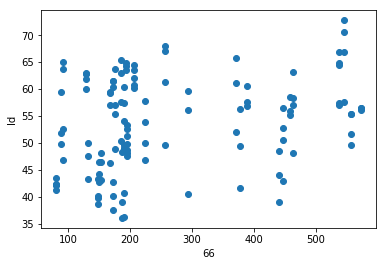

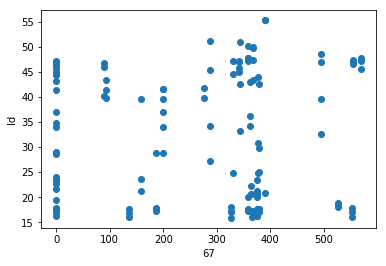

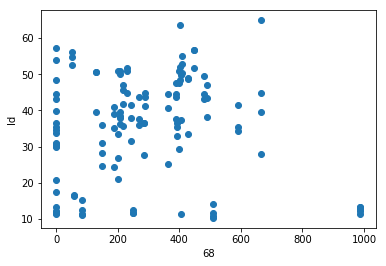

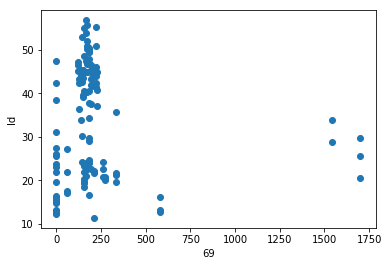

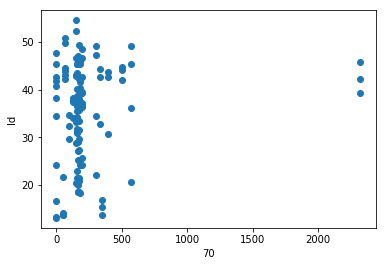

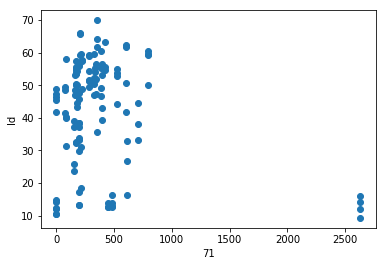

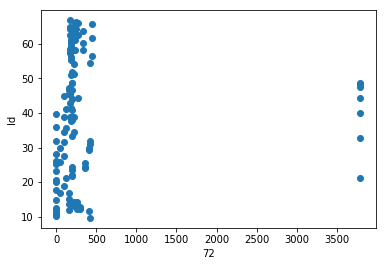

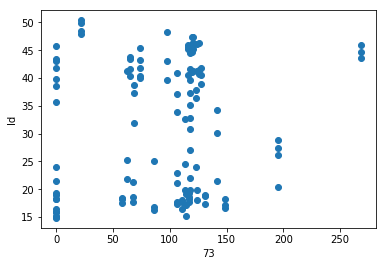

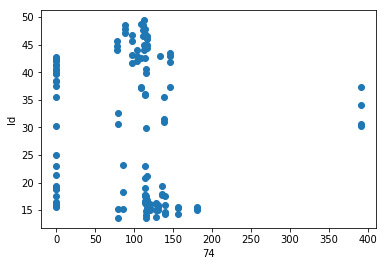

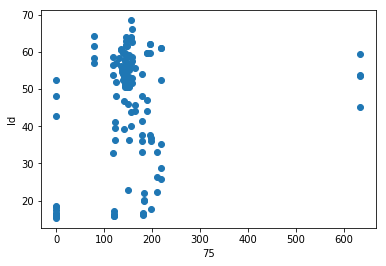

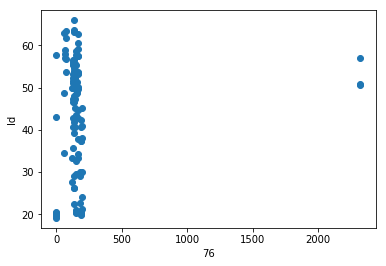

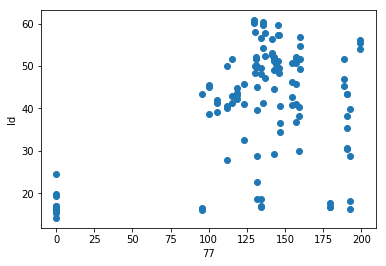

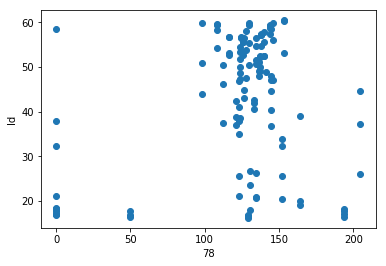

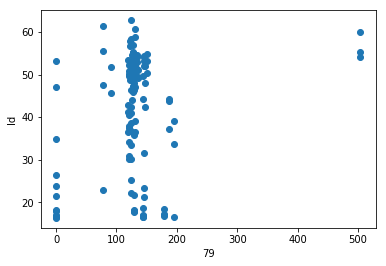

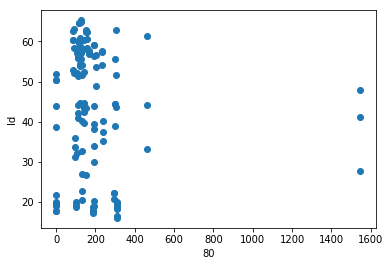

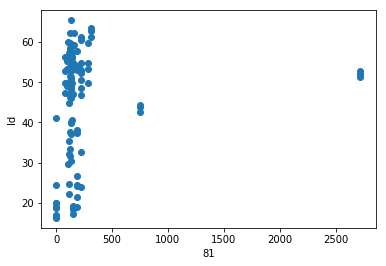

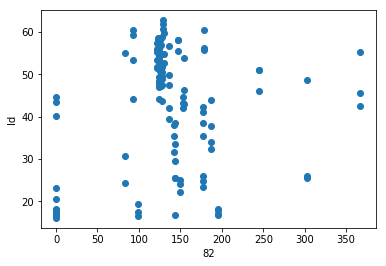

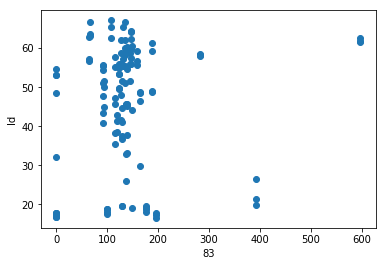

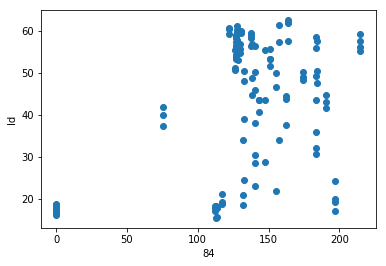

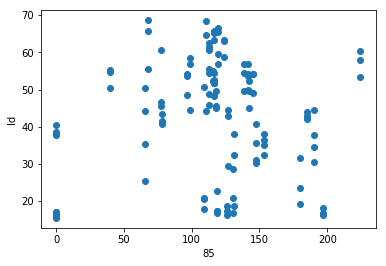

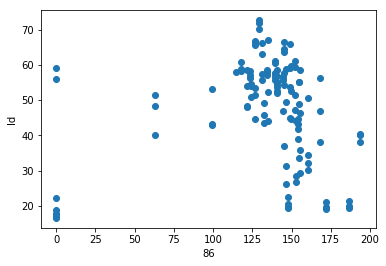

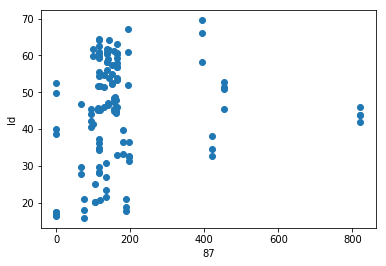

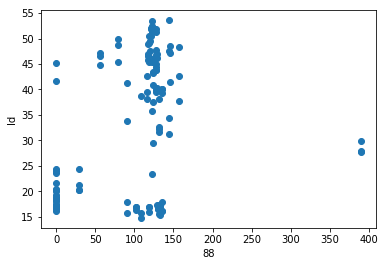

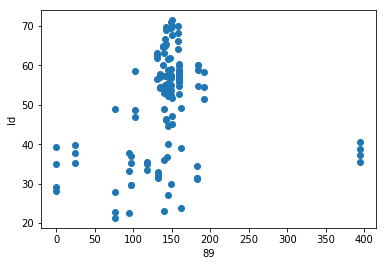

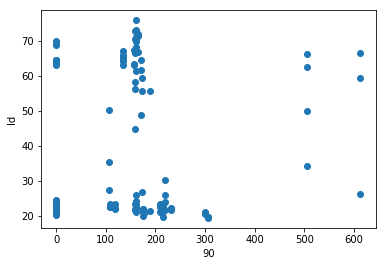

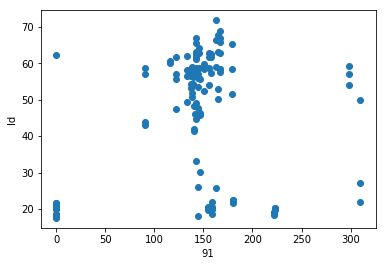

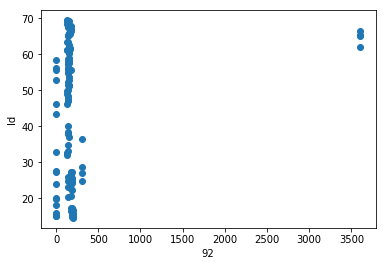

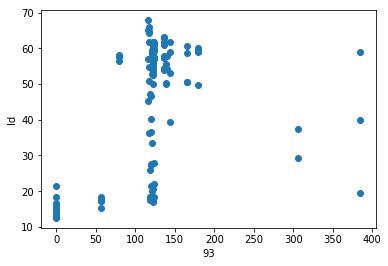

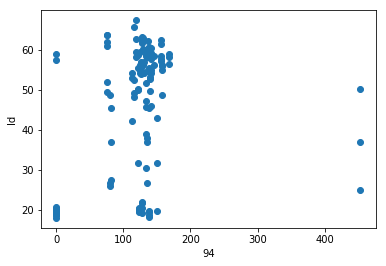

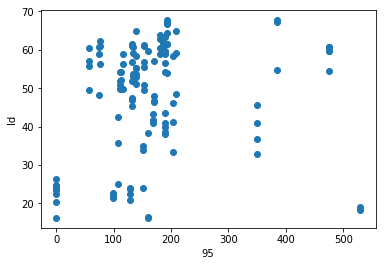

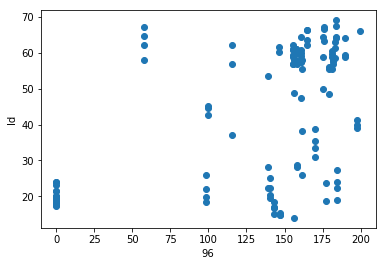

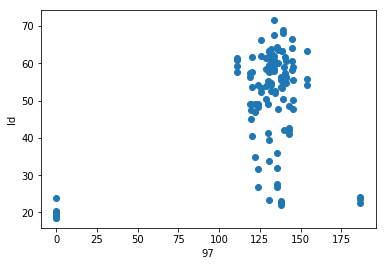

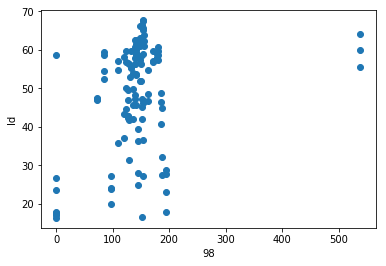

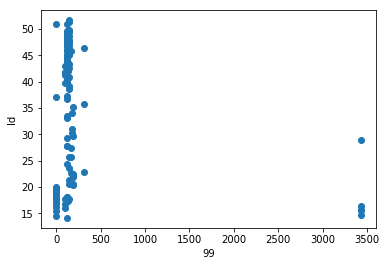

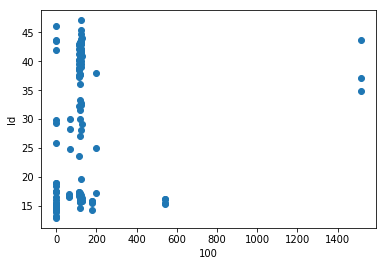

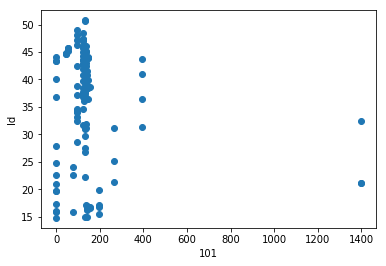

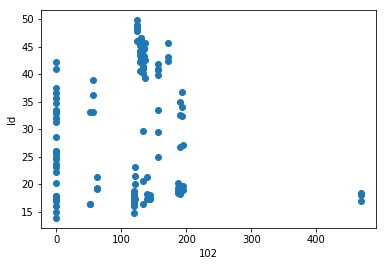

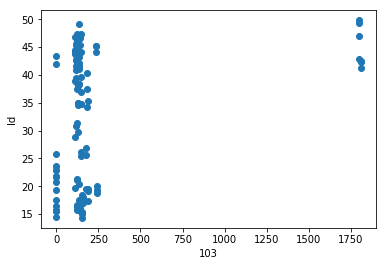

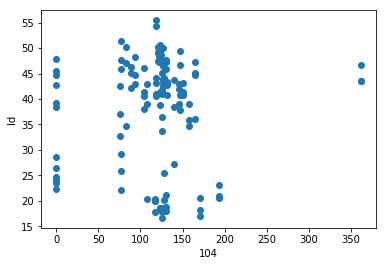

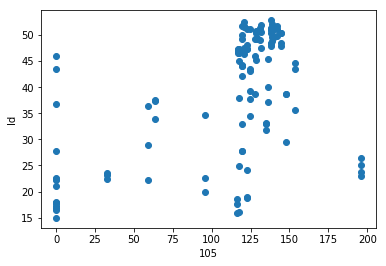

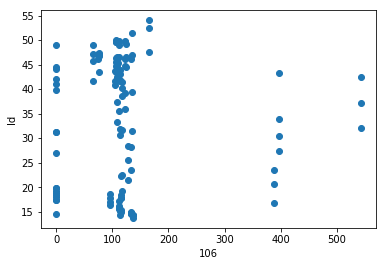

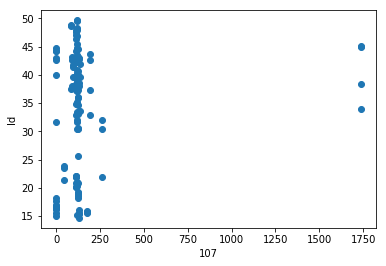

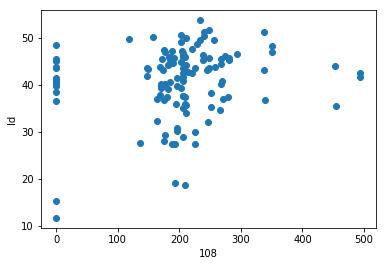

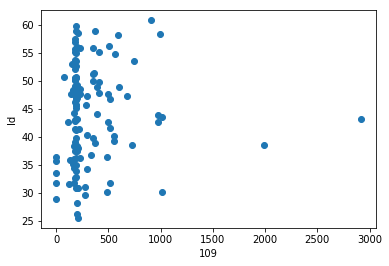

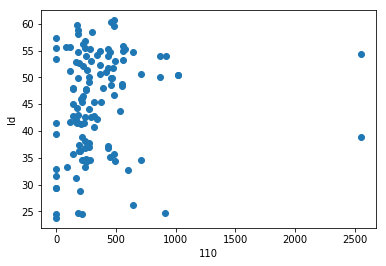

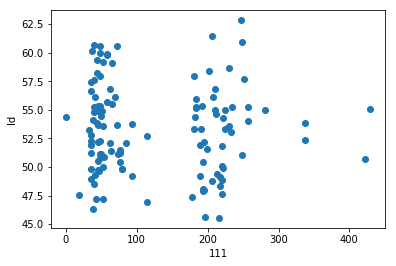

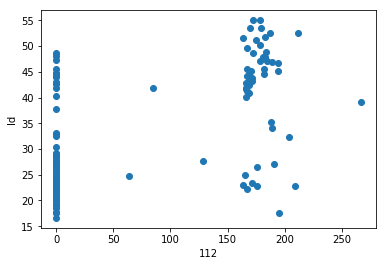

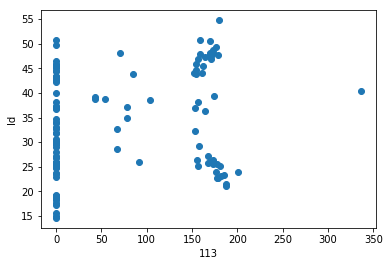

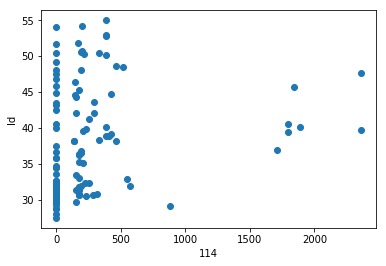

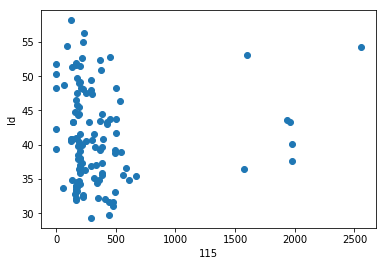

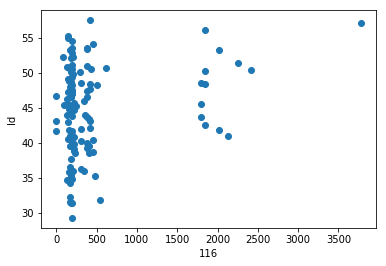

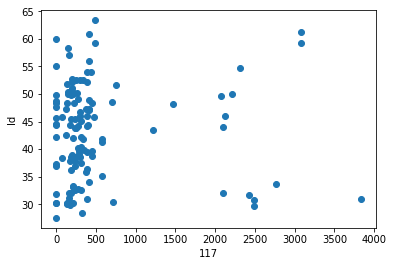

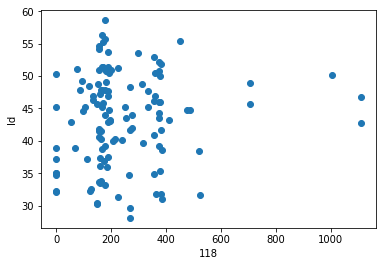

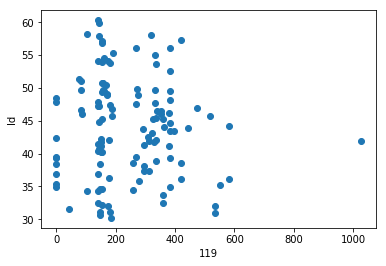

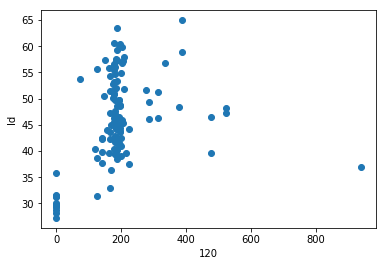

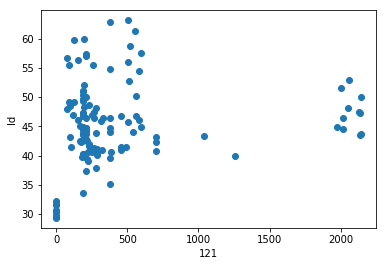

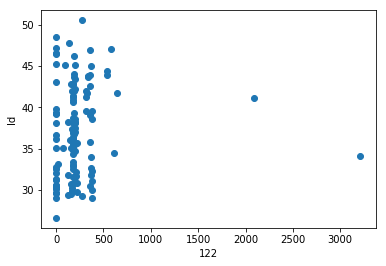

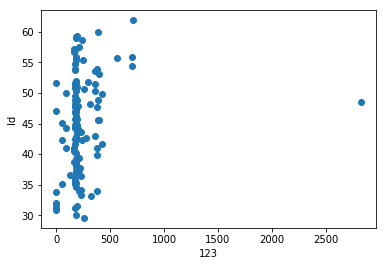

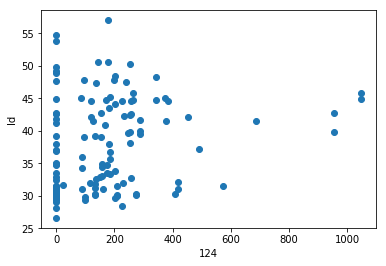

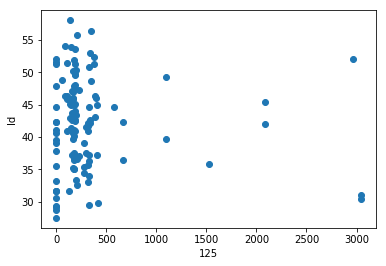

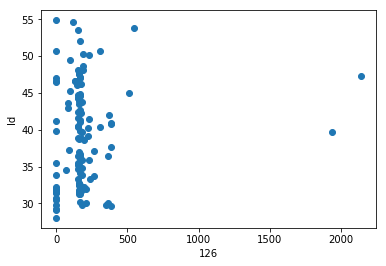

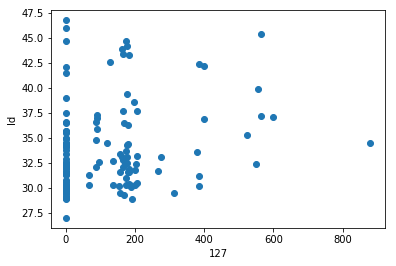

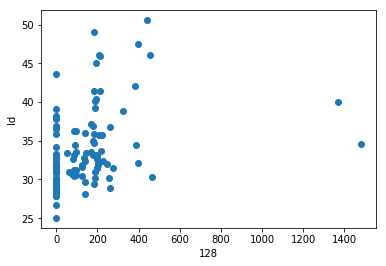

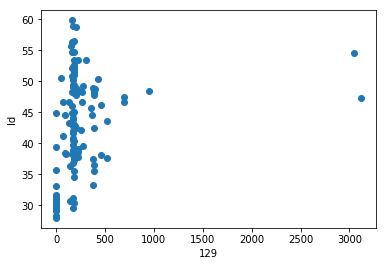

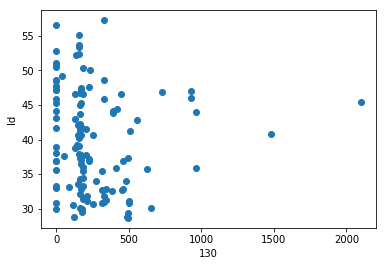

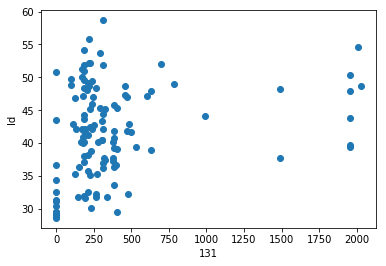

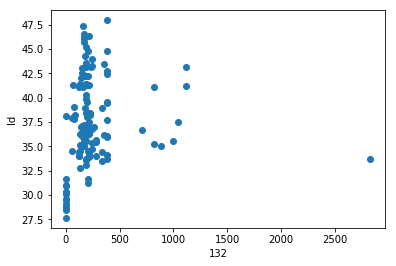

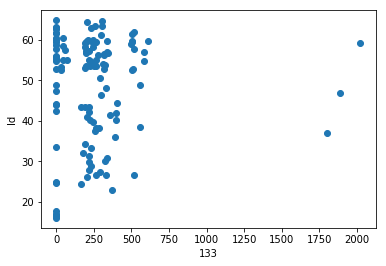

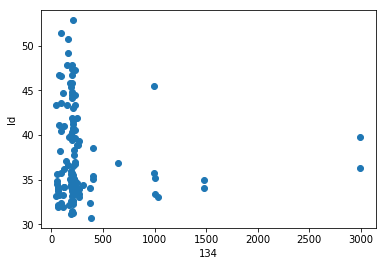

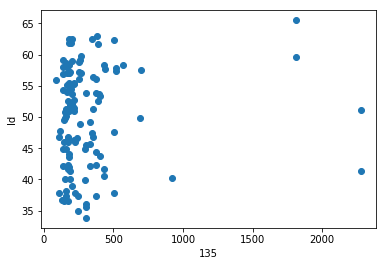

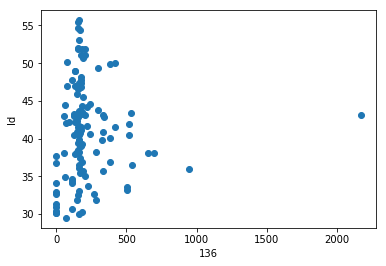

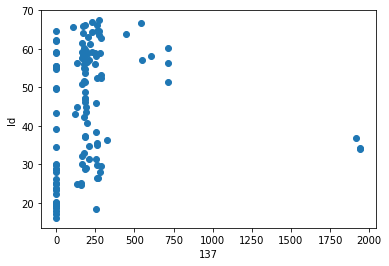

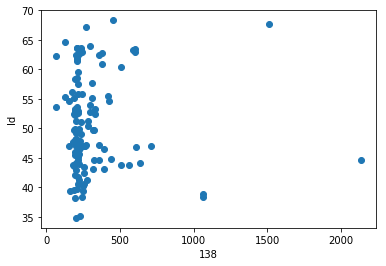

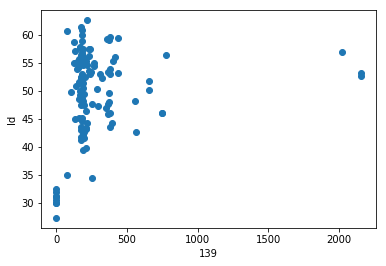

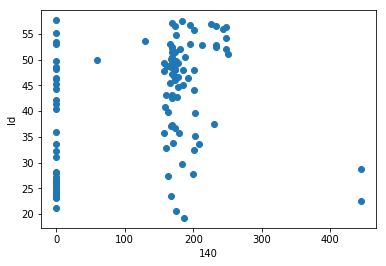

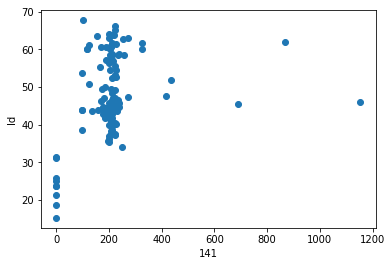

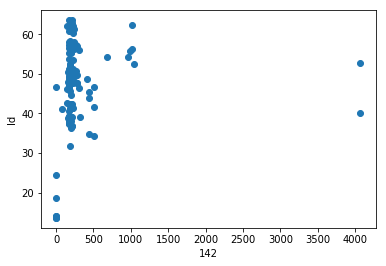

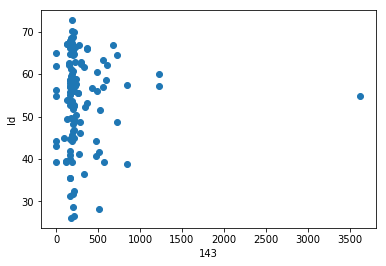

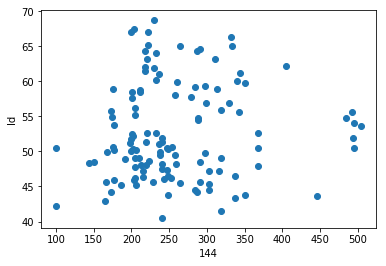

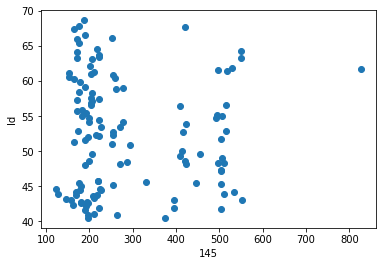

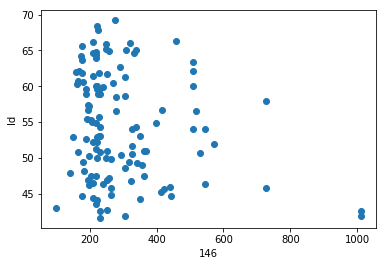

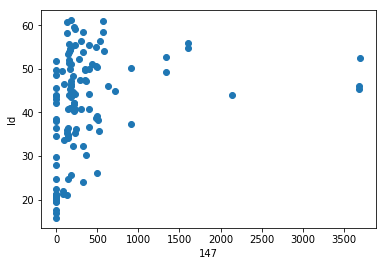

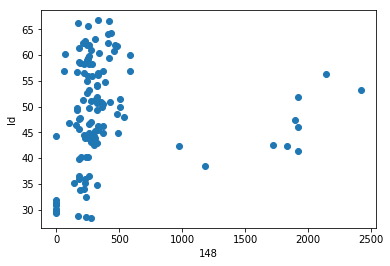

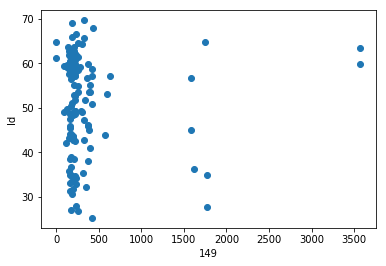

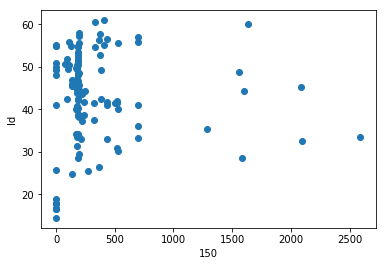

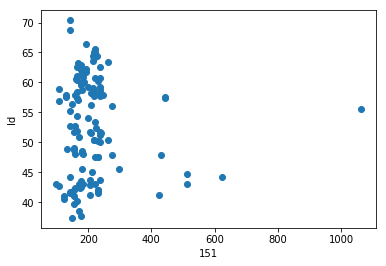

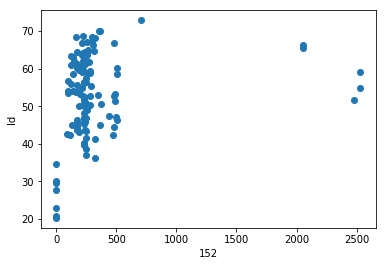

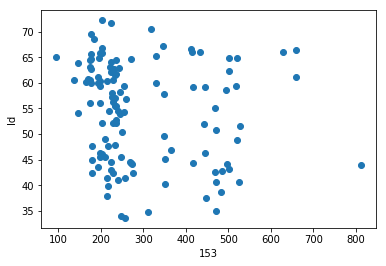

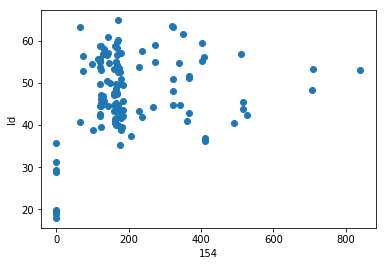

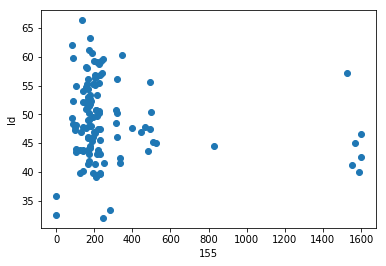

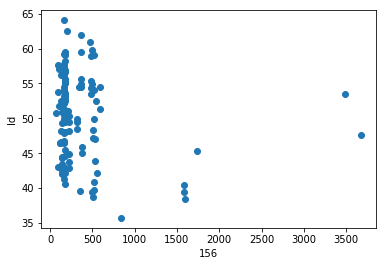

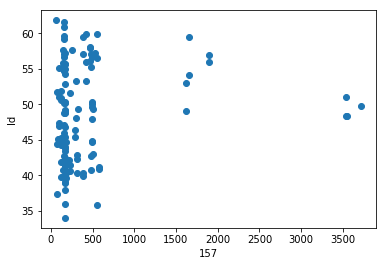

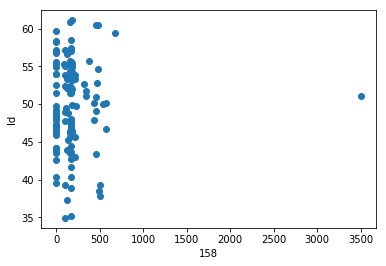

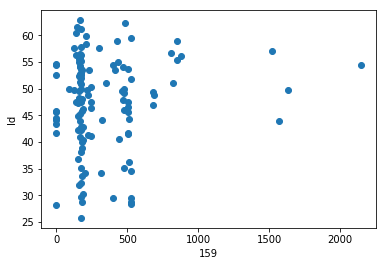

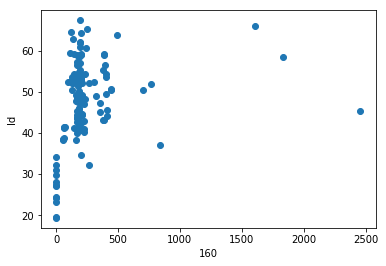

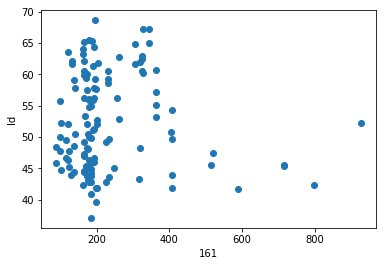

In [15]:
for i in range(len(female)):
    plt.scatter(x=female["Hz"][i], y = female["Db"][i])
    plt.ylabel('Id')
    plt.xlabel(i)
    plt.show()

In [16]:
for i in range(len(male)):
    for k in range(0,mini):
        if (male["Hz"][i][k] > 260):
            male['Hz'][i][k] = 260 
        else:
            continue
# data.loc[data['LotFrontage']>250, ['LotFrontage']]

for i in range(len(female)):
    for k in range(0,mini):
        if (female["Hz"][i][k] > 525):
            female['Hz'][i][k] = 525
        else:
            continue

# Modelling

In [53]:
#Creating our X matrix
cols=['Db','Hz']#selecting only hz and db data
mat=[] #empty matrix
for c in cols:
    for k in range(mini):
        l=[] #empty array
        for i in range(len(result)):
            l.append(result[c][i][k]) #filling the array making it the column we are going to use
        mat.append(l) #append our column to the matrix
X=pd.DataFrame(mat) #make it a pandas df
X=X.T #transpose it
X=pd.concat([X,result.Person],axis=1)#add person column

first 123 columns are the decibel records, while other 123 are the pitch record. we just want to add columns with summary of them in order to keep the relationship between values

In [54]:
#Adding mean, max, min and SD columns, for DB and for HZ
X['dbMean']=X.iloc[:,0:mini].mean(axis=1)
X['dbMax']=X.iloc[:,0:mini].max(axis=1)
X['dbMin']=X.iloc[:,0:mini].min(axis=1)
X['dbSd']=X.iloc[:,0:mini].std(axis=1)

X['hzMean']=X.iloc[:,mini:mini*2].mean(axis=1)
X['hzMax']=X.iloc[:,mini:mini*2].max(axis=1)
X['hzMin']=X.iloc[:,mini:mini*2].min(axis=1)
X['hzSd']=X.iloc[:,mini:mini*2].std(axis=1)

In [20]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,245,Person,dbMean,dbMax,dbMin,dbSd,hzMean,hzMax,hzMin,hzSd
0,51.509708,49.206464,53.098951,52.469692,53.167057,52.176484,48.654212,53.256975,52.688264,56.267311,...,78.327759,3,45.657025,60.430434,28.226776,10.198261,145.237673,260.0,0.000000,81.641767
1,55.108600,51.864689,51.652674,47.638640,49.127333,48.002193,53.917669,54.711934,54.078948,51.856219,...,332.609030,3,54.988873,67.219331,44.254314,5.501162,230.270785,525.0,34.603928,129.447513
2,29.527381,27.660101,25.288264,20.859257,22.952716,26.111523,39.505439,35.678947,34.919236,32.231507,...,64.099609,3,34.554521,57.734981,20.859257,6.980656,138.710652,260.0,0.000000,79.049734
3,33.119447,28.733595,33.640379,45.195911,46.322613,38.580593,42.709851,39.776593,30.642523,24.077781,...,168.398966,3,39.661745,62.649082,24.077781,7.639918,175.740902,260.0,75.366211,55.562299
4,19.453184,18.038502,16.372480,15.836151,23.020714,23.356387,21.816119,22.132527,21.352715,19.915726,...,497.380534,3,30.749519,54.035856,14.676970,10.982163,296.812608,525.0,0.000000,186.714036


In [55]:
#setting our y 
y=result.Male

#splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
X

,0,1,2,3,4,5,6,7,8,9,...,245,Person,dbMean,dbMax,dbMin,dbSd,hzMean,hzMax,hzMin,hzSd
0,51.509708,49.206464,53.098951,52.469692,53.167057,52.176484,48.654212,53.256975,52.688264,56.267311,...,78.327759,3,45.657025,60.430434,28.226776,10.198261,145.237673,260.00000,0.000000,81.641767
1,55.108600,51.864689,51.652674,47.638640,49.127333,48.002193,53.917669,54.711934,54.078948,51.856219,...,332.609030,3,54.988873,67.219331,44.254314,5.501162,230.270785,525.00000,34.603928,129.447513
2,29.527381,27.660101,25.288264,20.859257,22.952716,26.111523,39.505439,35.678947,34.919236,32.231507,...,64.099609,3,34.554521,57.734981,20.859257,6.980656,138.710652,260.00000,0.000000,79.049734
3,33.119447,28.733595,33.640379,45.195911,46.322613,38.580593,42.709851,39.776593,30.642523,24.077781,...,168.398966,3,39.661745,62.649082,24.077781,7.639918,175.740902,260.00000,75.366211,55.562299
4,19.453184,18.038502,16.372480,15.836151,23.020714,23.356387,21.816119,22.132527,21.352715,19.915726,...,497.380534,3,30.749519,54.035856,14.676970,10.982163,296.812608,525.00000,0.000000,186.714036
5,15.318119,15.571770,15.790184,14.489481,14.193075,13.240794,14.515410,22.945737,16.533766,15.099245,...,525.000000,3,31.987412,65.157982,13.212216,12.224053,276.139675,525.00000,0.000000,204.536657
6,42.121621,43.921944,42.266026,40.724797,41.766626,33.154358,37.626563,39.568687,37.865712,35.857447,...,260.000000,3,38.335807,60.153482,15.315006,8.983766,193.217264,260.00000,0.000000,86.124268
7,15.439696,19.230612,19.305615,20.988595,26.716130,31.375215,33.052923,35.418961,36.059312,36.889096,...,0.000000,3,40.490297,68.265537,15.439696,11.712099,290.075386,525.00000,0.000000,147.818644
8,31.236932,26.150167,36.681686,38.282048,39.844123,59.445015,61.696409,63.324444,61.310187,48.858112,...,67.506766,3,43.952579,73.813468,26.150167,10.014281,242.766746,525.00000,0.000000,137.270580
9,18.533753,19.354021,24.652758,30.450627,30.527406,27.984067,33.137324,31.169308,22.360835,23.404441,...,260.000000,3,31.952972,70.231584,8.425583,15.187239,161.260550,260.00000,0.000000,100.000005


# Random forest
## on Gender

In [22]:
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(X_train, y_train)  
RF.predict(X_test)

array([0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0.])

In [23]:
RF.score(X_test,y_test)

0.9431818181818182

In [58]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, X_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

ValueError: bad input shape (88, 255)

# Support vector machine 
## on Gender

In [24]:
SVM = svm.LinearSVC()  
SVM.fit(X_train, y_train)  
SVM.predict(X_test) 

C:\Users\yammo-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0.])

In [25]:
SVM.score(X_test,y_test)

0.7386363636363636

# Logistic regression
## on Gender

In [26]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)  
LR.predict(X_test)  

C:\Users\yammo-pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0.])

In [27]:
LR.score(X_test,y_test)

0.7386363636363636

# Neural Network
## on Gender

In [28]:
NN = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(5, 2), random_state=1)  
NN.fit(X_train, y_train)  
NN.predict(X_test)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [29]:
NN.score(X_test, y_test)

0.36363636363636365

# MODELS ON FEELING

In [30]:
y=result.Feeling 


#splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Support vector machine 
## on Feeling

In [31]:
SVM = svm.SVC(decision_function_shape="ovo")  
SVM.fit(X_train, y_train)  
SVM.predict(X_test) 

C:\Users\yammo-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [32]:
SVM.score(X_test,y_test)

0.26136363636363635

# Logistic regression
## on Feeling

In [33]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)  
LR.predict(X_test)

C:\Users\yammo-pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([3, 0, 3, 3, 0, 3, 2, 3, 3, 3, 0, 2, 1, 3, 3, 3, 1, 0, 1, 1, 0, 0,
       0, 2, 1, 2, 3, 3, 3, 0, 3, 3, 2, 2, 1, 0, 2, 0, 1, 0, 1, 1, 0, 3,
       1, 1, 2, 0, 3, 0, 2, 3, 0, 0, 1, 3, 3, 1, 3, 2, 3, 0, 2, 0, 3, 3,
       0, 1, 3, 1, 0, 0, 2, 0, 3, 3, 3, 2, 3, 1, 0, 3, 3, 2, 0, 3, 1, 0])

In [34]:
LR.score(X_test,y_test)

0.3522727272727273

# Random forest
## on Feeling

In [35]:
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(X_train, y_train)  
RF.predict(X_test)

array([2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 2, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 2, 0, 3, 0, 0, 3, 3, 2, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0,
       0, 3, 0, 3, 2, 2, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 2, 0])

In [36]:
RF.score(X_test,y_test)

0.4431818181818182

# Neural Network
## on Feeling

In [37]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)  
NN.fit(X_train, y_train)  
NN.predict(X_test)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [38]:
NN.score(X_test, y_test)

0.26136363636363635

# Clustering

In [39]:
##set the kmean model
kmeans = KMeans(init='k-means++', n_init=10, n_clusters=2, random_state=0).fit(list(result["Db"]))

In [40]:
##predict the gender from Db for each line in the matrix
count=0 #to count how many times it's right
for i in range(len(result)):
    pred=kmeans.predict(list([result["Hz"][i]])) #say in which cluster is the datapoint db, i
    true=result["Male"][i] #the true Male value of line i 
    
#     print(str(pred)+" "+str(true))
    if pred==true: #if he get the real value
        count+=1
# print(str(count)+"/"+str(len(result)))     #print how many times it predict  
print(count/len(result))

0.3886792452830189


In [41]:
"""#let's now encode the cathegorical variables
toAdd=pd.get_dummies(result['Person']).reset_index(drop=True)
result=pd.concat([result,toAdd], axis=1, sort=False)

toAdd=pd.get_dummies(result['Feeling']).reset_index(drop=True)
result=pd.concat([result,toAdd], axis=1, sort=False)

result=result.drop(['Person','Feeling'],axis=1)"""

"#let's now encode the cathegorical variables\ntoAdd=pd.get_dummies(result['Person']).reset_index(drop=True)\nresult=pd.concat([result,toAdd], axis=1, sort=False)\n\ntoAdd=pd.get_dummies(result['Feeling']).reset_index(drop=True)\nresult=pd.concat([result,toAdd], axis=1, sort=False)\n\nresult=result.drop(['Person','Feeling'],axis=1)"

In [42]:
""""count=0
for i in range(len(y_test)):
    print(y_test.reset_index(drop=True)[i],end= "-")
    print(LR.predict(X_test)[i], end='')
    if LR.predict(X_test)[i]==y_test.reset_index(drop=True)[i]:
        print(' well done! \n')
        count+=1
    else:
        print('\n')
print(count/len(y_test))""""

SyntaxError: EOL while scanning string literal (<ipython-input-42-afb6fdc57f78>, line 10)

In [ ]:
"""result.head()"""

In [ ]:
"""#Create a new matrix 26x123x2 in which we have
#26 lines--->the number of records
#123 cols--->the pitch&Db recorded by SJapp
#2 elements for each cell---> Db, Hz
newVec=[]#gonna be our final result
for i in range(len(result)):
    temp=[]#gonna have 26 of this
    for k in range(len(result["Db"][i])):#fill our temp with a 123x2 matrix
        d=result["Db"][i][k]
        h=result["Hz"][i][k]
        temp.append([d,h])#for each cycle it writes a cell with 2 values (db,hz)
    newVec.append(temp)
newVec"""

In [ ]:
"""#trying to do with Hz and Db toghether
kmeans = KMeans(n_clusters=2, random_state=0).fit(newVec)"""

In [ ]:
"""count=0
for i in range(len(result)):
    pred=kmeans.predict(list([result["Hz"][i]+result["Db"][i]]))
    true=result["Male"][i]
    
    print(str(pred)+" "+str(true))
    if pred==true:
        count+=1
print(str(count)+"/"+str(len(result)))"""      

In [ ]:
"""###change the values 0 in pitch with the mean 
#NOT NECESSARY! DON'T RUN IT
for i in range(len(result)):
    for k in range(len(result["Hz"][i])):
        if result["Hz"][i][k]==0:
            result["Hz"][i][k]=mean(result["Hz"][i])"""